In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 165.2 kB/s eta 0:10:04
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.2/99.8 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.5/99.8 MB 1.3 MB/s eta 0:01:14
   -------------------------------

In [31]:
import xgboost as xgb

In [4]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers

In [32]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [33]:
data=pd.read_csv('C:\\Users\\SHREENATH S HEBBAR\\Documents\\python\\Machine Learning\\Projects\\solar_radiation\\SolarPrediction.csv')

In [34]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [36]:
df=data.copy()

In [37]:
df["Data"]=df["Data"].apply(lambda x:x.split()[0])

In [38]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [39]:
df['Month']=pd.to_datetime(df["Data"]).dt.month
df['Day']=pd.to_datetime(df["Data"]).dt.day
df['Hour']=pd.to_datetime(df["Time"]).dt.hour
df['Minute']=pd.to_datetime(df["Time"]).dt.minute
df['Second']=pd.to_datetime(df["Time"]).dt.second

In [40]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [41]:
df["risehour"]=df["TimeSunRise"].apply(lambda x: re.search(r'^\d+',x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [42]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [43]:
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [44]:
df.shape

(32686, 15)

In [45]:
df.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
risehour                  0
riseminuter               0
sethour                   0
setminute                 0
dtype: int64

In [46]:
x=df.drop(["Radiation"],axis=1)
y=df["Radiation"]

In [47]:
corr1=df.corr()
corr1

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


<Axes: >

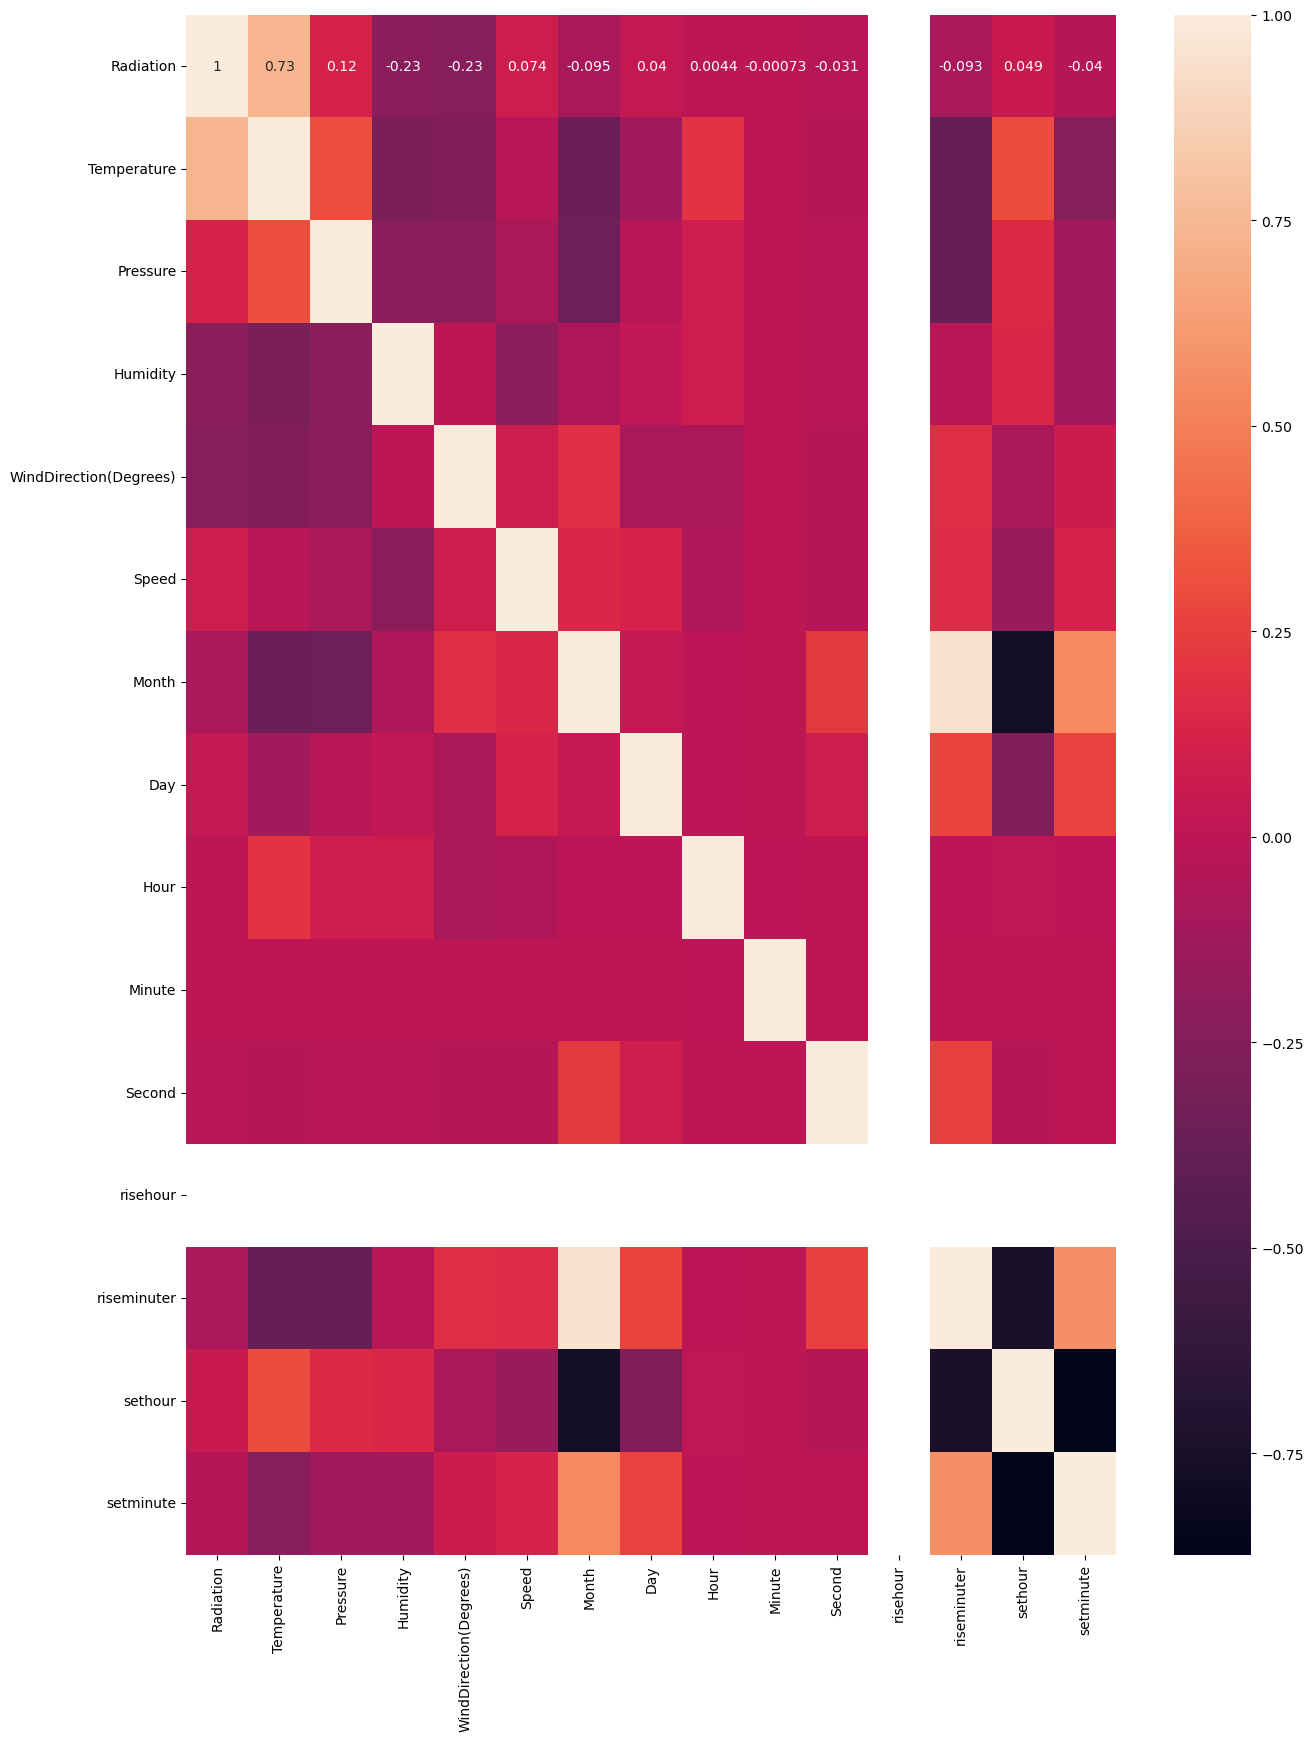

In [48]:
plt.figure(figsize=(15,20))
sns.heatmap(corr1,annot=True)

In [49]:
from sklearn.feature_selection import chi2
best=SelectKBest(score_func=chi2,k=10)

In [50]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_Y = label.fit_transform(y)



In [51]:
target_cont = df['Radiation'].apply(lambda x : int(x*100))
scaled_input_features = MinMaxScaler().fit_transform(x)
fit = best.fit(scaled_input_features, train_Y)

In [52]:
fit1 = best.fit(scaled_input_features, target_cont)

In [53]:
fit.scores_

array([ 1651.68563214,   523.79106046,  1588.08743322,  3271.82727734,
         765.85977881,  4684.57961042,  2841.92685032,   691.18539264,
        2702.44933263,  2288.67303161,            nan,  4015.06277087,
       12207.53145397,  1863.71208749])

In [54]:
fit1.scores_

array([ 1651.68563214,   523.79106046,  1588.08743322,  3271.82727734,
         765.85977881,  4684.57961042,  2841.92685032,   691.18539264,
        2702.44933263,  2288.67303161,            nan,  4015.06277087,
       12207.53145397,  1863.71208749])

In [55]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(x.columns)

In [56]:
featureScores = pd.concat([column, scores], axis=1)
featureScores.columns = ['Features', 'feature_imp'] 

In [57]:
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
12,sethour,12207.531454
5,Month,4684.579610
11,riseminuter,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setminute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


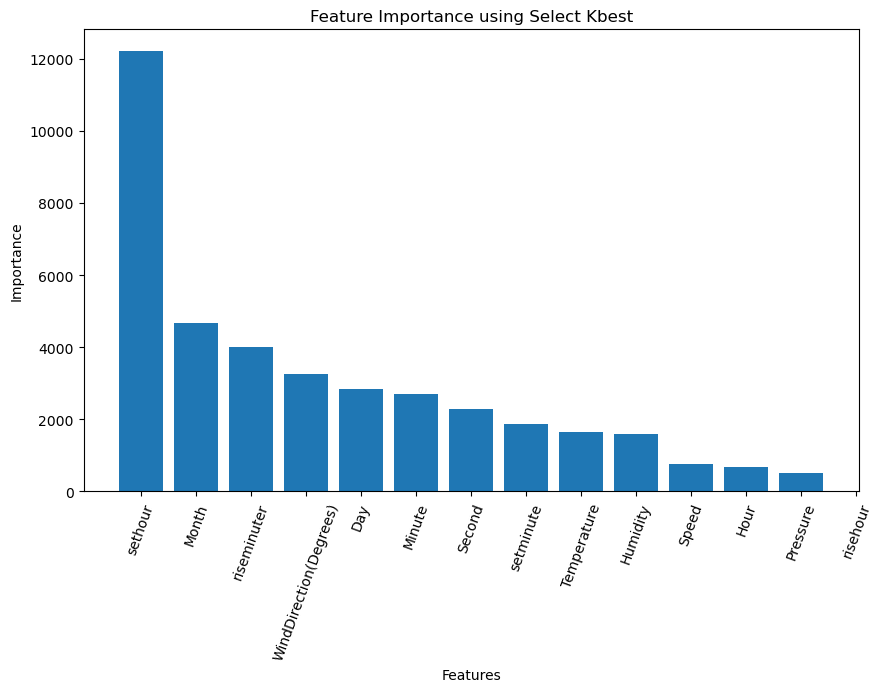

In [58]:
plt.figure(figsize = (10, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Select Kbest")
plt.show()

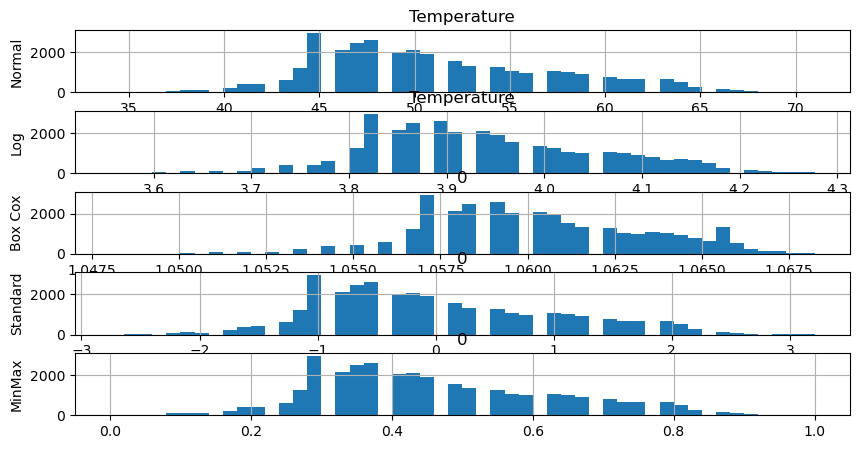

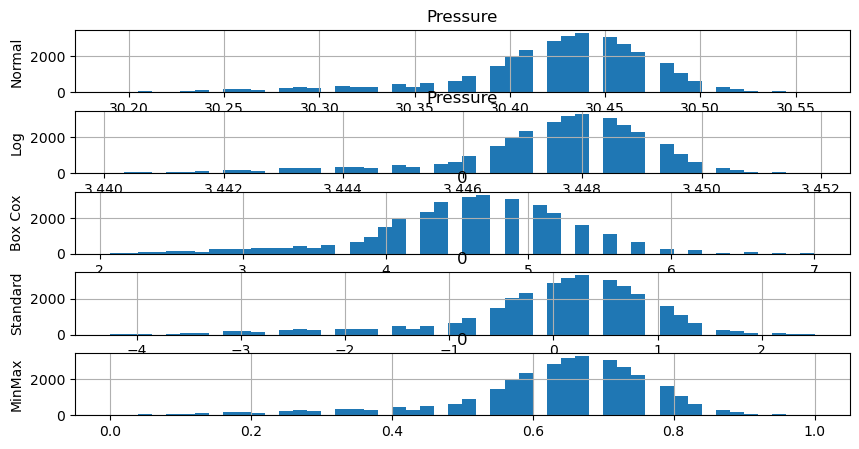

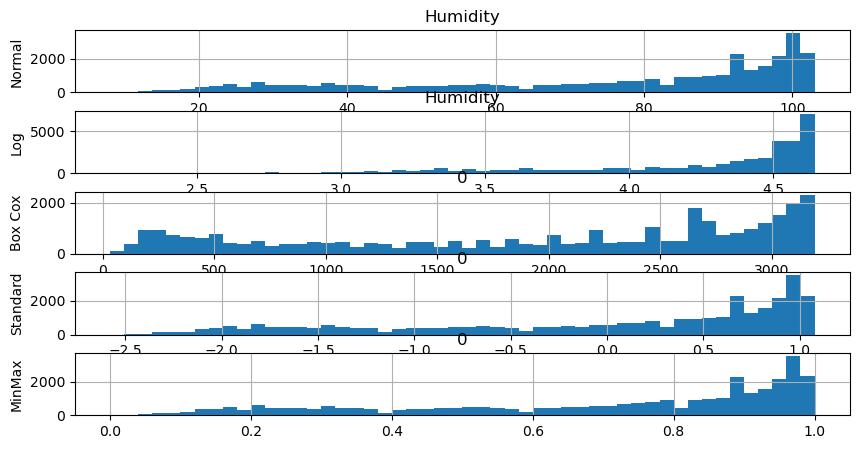

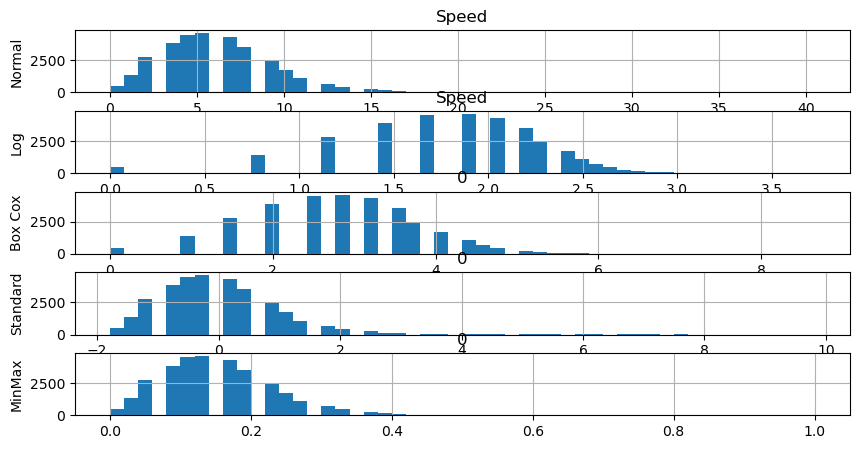

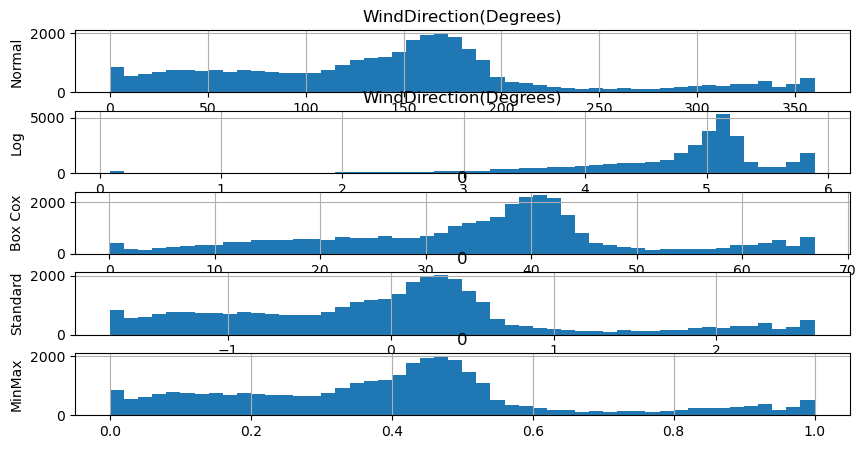

In [66]:
feature1=['Temperature','Pressure','Humidity','Speed','WindDirection(Degrees)']
for i in feature1:
    fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(10,5))
     
    pd.DataFrame(x[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((x[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(x[i]+1)[0]).hist(ax = ax3, bins = 50)    
    pd.DataFrame(StandardScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(x[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')



In [68]:
transform = {'Temperature' : (x['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(x['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(x['Humidity']+1)[0], 
            'Speed' : (x['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(x['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    x[i] = transform[i]

In [69]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
scaler=StandardScaler()

In [70]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [71]:
xtrain.shape,xtest.shape

((26148, 14), (6538, 14))

XGBOOST


In [72]:
from xgboost import XGBRegressor
params={'learning_rate':0.1,'max_depth':8}
model=XGBRegressor(**params)


In [73]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [74]:
ypred=model.predict(xtest)

In [76]:
rmse=np.sqrt(mean_squared_error(ytest,ypred))
r2=r2_score(ytest,ypred)
print("Perfomance is")
print("RMSE",rmse)
print("R2",r2)

Perfomance is
RMSE 81.87487899714382
R2 0.9311818598143073


In [78]:
model=None
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=14))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='relu'))
model.compile(metrics=['mse'],loss='mae',optimizer=Adam(learning_rate=0.001))
print(model.summary())



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [79]:
h=model.fit(xtrain,ytrain,validation_split=0.1,epochs=50,batch_size=32)

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 158.2998 - mse: 90320.0859 - val_loss: 77.9791 - val_mse: 22656.2266
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 85.9059 - mse: 27562.1191 - val_loss: 69.6519 - val_mse: 18095.0488
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 82.2827 - mse: 25079.8516 - val_loss: 65.9783 - val_mse: 16473.0059
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 77.4327 - mse: 22836.7500 - val_loss: 62.4162 - val_mse: 15095.7842
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 75.1899 - mse: 21796.2051 - val_loss: 57.9803 - val_mse: 13542.7920
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 72.2382 - mse: 20186.9141 - val_loss: 58.1621 - val_mse: 13499.5049
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 71.1977 - mse: 19723.2676 - val_loss: 53.5895 - val_mse: 12310.5088
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 70.7578 - mse: 19924.8340 - val_loss: 52.39

In [84]:
h.history

{'loss': [120.73359680175781,
  84.80797576904297,
  80.13761901855469,
  76.60928344726562,
  74.54225158691406,
  72.46673583984375,
  70.91445922851562,
  68.8006591796875,
  68.05835723876953,
  67.01151275634766,
  65.79600524902344,
  65.11180114746094,
  64.9576187133789,
  64.79618835449219,
  64.35759735107422,
  63.07581329345703,
  62.825340270996094,
  62.8960075378418,
  62.39771270751953,
  62.26200866699219,
  61.94231414794922,
  62.050174713134766,
  61.22710037231445,
  60.614078521728516,
  60.482784271240234,
  59.788089752197266,
  60.171329498291016,
  59.87937545776367,
  60.01899337768555,
  59.24531555175781,
  59.524810791015625,
  59.29133605957031,
  59.496849060058594,
  59.33045196533203,
  58.693660736083984,
  59.01246643066406,
  58.788856506347656,
  59.075958251953125,
  58.104129791259766,
  58.13908004760742,
  58.48187255859375,
  58.39638900756836,
  57.62153244018555,
  57.78015899658203,
  57.3809700012207,
  57.66939163208008,
  56.873027801513

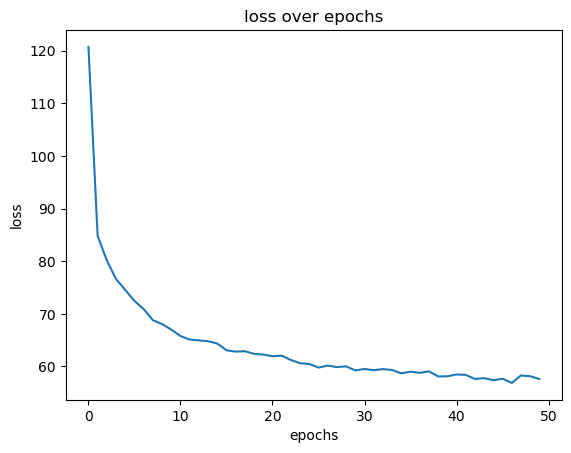

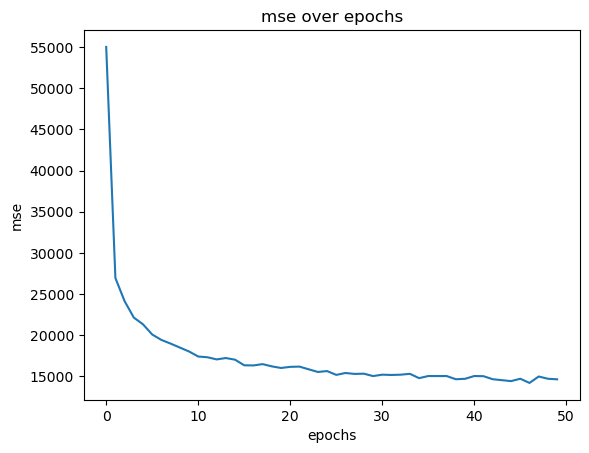

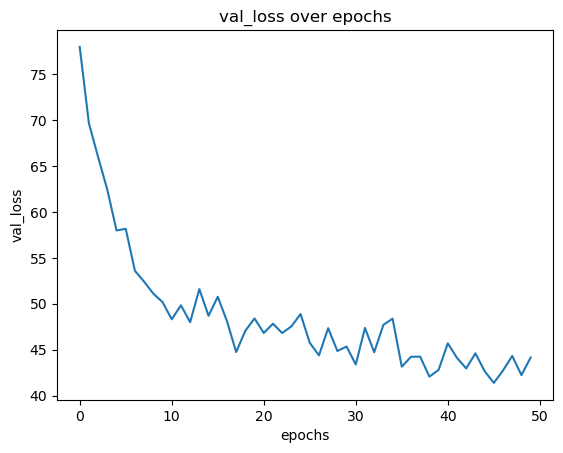

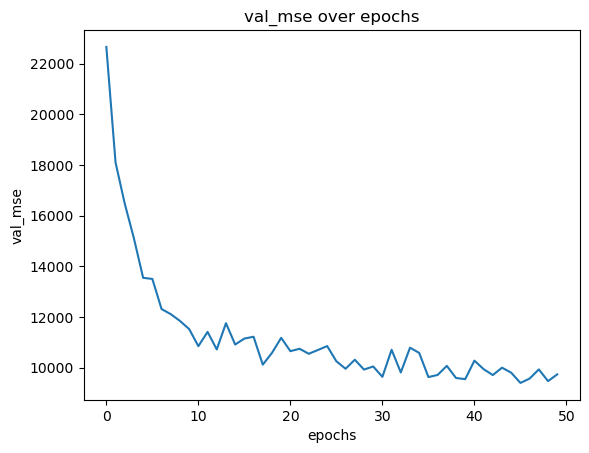

In [81]:
fit = h.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [85]:
y2=model.predict(xtest)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [86]:
mean_absolute_error(ytest,y2)

42.419771610093285